# Assignment 2

This assignment serves as a comprehensive evaluation of your machine learning skills, encompassing not only the technical aspects of model development but also your ability to analyze, interpret, and present data insights effectively. As such, it's essential to ensure that your submission is complete, functional, and devoid of any obvious gaps, as if you were delivering this project to a client.

To achieve this, leverage the full capabilities of Markdown and the interactive visualization tools available in Jupyter notebooks to craft a well-structured and visually appealing report of your findings. Your report should clearly communicate the insights you've gained from the exploratory data analysis, the rationale behind your data preprocessing and feature engineering decisions, and a thorough analysis of feature importance. High-quality visualizations and well-organized documentation will not only support your analysis but also make your results more accessible and understandable to your audience.

Remember, the ability to present complex results in an intuitive and engaging manner is a crucial skill, almost as important as the technical proficiency in model building and data analysis. Treat this assignment as an opportunity to showcase your skills in both areas.

## Instructions
- Your submission should be a `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. It should include the answers to the questions in markdown cells, your data analysis and results.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell. [Academic misconduct policy](https://wiki.innopolis.university/display/DOE/Academic+misconduct+policy)
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions and decisions.

## Self-Reliance and Exploration
In this task, you're encouraged to rely on your resourcefulness and creativity. Dive into available resources, experiment with various solutions, and learn from every outcome. While our team is here to clarify task details and offer conceptual guidance, we encourage you to first seek answers independently. This approach is vital for developing your problem-solving skills in machine learning.



# Task 2: Image Classification with CNNs (50%)

In this task, you'll dive into the world of Convolutional Neural Networks (CNNs) by working with the CIFAR-10 dataset, a staple in image classification challenges. Your goal is to build and evaluate two different CNN models to classify images into one of the ten categories accurately.

The dataset is availabel in pytorch and keras.

## Part 1: Custom CNN Model (20%)

- Design and train a CNN model from scratch tailored for the CIFAR-10 dataset.
- Focus on the architecture that you believe will perform best for this specific task.
- Integrate various techniques such as batch normalization, dropout, learning rate schedulers, and early stopping to improve model training. Experiment with these methods and finetune them to see how they affect training stability, convergence speed, and overall performance.

## Part 2: Transfer Learning Model (20%)

- Implement a transfer learning approach using a pre-trained model of your choice.
- Fine-tune the model on the CIFAR-10 dataset to achieve the best possible performance.

## Evaluation (10%)

Ensure that both models are robust and generalized well to unseen data.

After training both models, you will evaluate them on a provided test dataset.

Compare your models based on:
- **AUC-ROC**: How well does each model discriminate between classes?
- **Model Size**: Consider the trade-offs in model complexity.
- **Inference Speed**: Evaluate how quickly your model can predict classes for new images.

Reflect on the performance, size, and inference speed of both models. What insights can you draw from these comparisons?

### Learning Objectives

- Understand and apply CNNs for image classification.
- Explore the impact of model architecture on performance and efficiency.
- Learn the process and benefits of transfer learning in deep learning.

Remember, the key to this task is not just about achieving the highest accuracy but also understanding the strengths and limitations of different approaches in machine learning model development.

**Part 1: Custom CNN Model**

In [1]:
import torch
from torch.utils import data
from torchvision import datasets, transforms

train_batch_size = 128
test_batch_size = 128

# put augmentations
train_transforms = transforms.Compose([
    transforms.RandomCrop(32, padding=2),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='cifar10',
                                 train=True,
                                 transform=train_transforms,
                                 download=True)

train_data_loader = data.DataLoader(train_dataset,
                                    batch_size=train_batch_size,
                                    shuffle=True,
                                    drop_last=True,
                                    num_workers=2)

test_dataset = datasets.CIFAR10(root='cifar10',
                                 train=False,
                                 transform=test_transforms,
                                 download=True)

test_data_loader = data.DataLoader(test_dataset,
                                    batch_size=test_batch_size,
                                    shuffle=False,
                                    num_workers=2)

100%|██████████| 170498071/170498071 [00:04<00:00, 40260280.78it/s]


Extracting cifar10/cifar-10-python.tar.gz to cifar10
Files already downloaded and verified


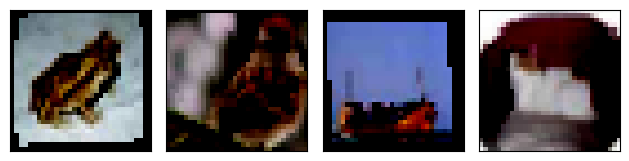

In [ ]:
# check the results of transformations
import matplotlib.pyplot as plt
images, _ = next(iter(train_data_loader))

fig, axs = plt.subplots(nrows=1, ncols=4)

for i in range(4):
    ax = axs[i]
    ax.imshow(images[i].numpy().transpose(1,2,0))
    ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

plt.tight_layout()
plt.show()

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# define custom model
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        # Build your model
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=3,
                out_channels=32,
                padding=1,
                kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(32)
        )
        self.conv2 = nn.Sequential(
            # padding=1
            nn.Conv2d(in_channels=32,
                      out_channels=64,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(0.25)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=64,
                      out_channels=128,
                      kernel_size=3,
                      padding=1), #32, 64, 3
            nn.ReLU(),
            nn.BatchNorm2d(128), #64
        )
        self.linear1 = nn.Sequential(
            nn.Linear(128*16*16, 512), #64*11*11, 256
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, 10) #256, 10
        )


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = torch.flatten(x, 1)
        x = self.linear1(x)
        return F.log_softmax(x, dim=1)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = CustomModel().to(device)

print(f'Device: {device}')

print(model)

Device: cuda
CustomModel(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.25, inplace=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (linear1): Sequential(
    (0): Linear(in_features=32768, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
import operator
import numpy as np

class EarlyStopping():
    def __init__(self, tolerance=5, min_delta=0, mode='min'):
        '''
        :param tolerance: number of epochs that the metric doesn't improve
        :param min_delta: minimum improvement (was 0)
        :param mode: 'min' or 'max' to minimize or maximize the metric
        '''
        self.tolerance = tolerance
        self.min_delta = min_delta
        self.mode = mode
        self.counter = 0
        self.early_stop = False
        self.prev_metric = np.inf if mode == 'min' else -np.inf
        self.operation = operator.gt if mode == 'min' else operator.lt


    def __call__(self, metric)->bool:
        ''' This function should return True if `metric` is not improving for
            'tolerance' calls
        '''
        delta = (metric - self.prev_metric)

        if self.operation(delta, self.min_delta):
            self.counter +=1
        else:
            self.counter = 0
            self.prev_metric = metric

        if self.counter >= self.tolerance:
            self.early_stop = True
        return self.early_stop

In [ ]:
from time import time
from tqdm import tqdm

# define train function
def train(model, device, train_loader, criterion, optimizer, epoch):
    model.train()
    epoch_loss = 0
    start_time = time()
    correct = 0
    iteration = 0

    bar = tqdm(train_loader)
    for data, target in bar:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        iteration += 1
        bar.set_postfix({"Loss": format(epoch_loss/iteration, '.6f')})

    acc = 100. * correct / len(train_loader.dataset)
    print(f'\rTrain Epoch: {epoch}, elapsed time:{time()-start_time:.2f}s')
    return epoch_loss, acc

# define function to perform of test data
def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    acc = 100. * correct / len(test_loader.dataset)
    return test_loss, acc

In [ ]:
from torch.optim import SGD, lr_scheduler
from copy import deepcopy

# set up training parameters
epochs = 60 #40 Train-76.26% test-80.18%

criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min',
                                           factor=0.3, patience=3,
                                           verbose=True, min_lr=0.001)
early_stopping = EarlyStopping(tolerance=7, mode='min')

best_model_wts = deepcopy(model.state_dict())

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import copy

def training(train_model
            #  , writing=False
             ):
    # if writing:
    #     writer = SummaryWriter(log_dir=f'runs/{train_model}')
    best_acc = 0.0
    for epoch in range(1, epochs + 1):
        train_loss, train_acc = train(train_model, device, train_data_loader, criterion, optimizer, epoch)
        # Update learning rate if needed
        scheduler.step(train_loss)

        test_loss, test_acc = test(train_model, device, test_data_loader, criterion)
        # Terminate training if loss stopped to decrease
        if early_stopping(test_loss):
            print('\nEarly stopping\n')
            break
        # Deep copy the weight of model if its accuracy is the best for now
        if test_acc > best_acc:
            best_acc = test_acc
            # best_model_wts = copy.deepcopy(train_model.state_dict())
        # if writing:
        #     writer.add_scalars('Loss',
        #                     {
        #                         'train': train_loss,
        #                         'test': test_loss
        #                     },
        #                     epoch)

        #     writer.add_scalars('Accuracy',
        #                     {
        #                         'train': train_acc,
        #                         'test': test_acc
        #                     },
        #                     epoch)
        # else:
        print(f"Training accuracy {train_acc}, test accuracy {test_acc}")
        print(f"Training loss {train_loss}, test loss {test_loss}")

    # torch.save(train_model.state_dict(), f"{train_model}.pt")
    # train_model.load_state_dict(best_model_wts)
    # torch.save(train_model.state_dict(), f"best_{train_model}.pt")
    # if writing:
    #     writer.close()

training(train_model=model)

  0%|          | 0/390 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
 38%|███▊      | 148/390 [02:17<04:24,  1.09s/it, Loss=2.337391]

In [ ]:
# evaluate the trained custom model on test dataset
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_data_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of a Custom Model on test set: {100 * correct / total}%")

**Part 2: Transfer Learning Model**

In [ ]:
import torchvision.models as models

# load pre-trained ResNet model
resnet = models.resnet18(pretrained=True)
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 10)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
resnet = resnet.to(device)

print(f'\nDevice: {device}')

print(resnet)

In [ ]:
# def training(model, writing=False):
#     if writing:
#         writer = SummaryWriter(log_dir='runs/model')
#     best_acc = 0.0
#     for epoch in range(1, epochs + 1):
#         train_loss, train_acc = train(model, device, train_data_loader, criterion, optimizer, epoch)
#         # Update learning rate if needed
#         scheduler.step(train_loss)

#         test_loss, test_acc = test(model, device, test_data_loader, criterion)
#         # Terminate training if loss stopped to decrease
#         if early_stopping(test_loss):
#             print('\nEarly stopping\n')
#             break
#         # Deep copy the weight of model if its accuracy is the best for now
#         if test_acc > best_acc:
#             best_acc = test_acc
#             best_model_wts = copy.deepcopy(model.state_dict())
#         if writing:
#             writer.add_scalars('Loss',
#                             {
#                                 'train': train_loss,
#                                 'test': test_loss
#                             },
#                             epoch)

#             writer.add_scalars('Accuracy',
#                             {
#                                 'train': train_acc,
#                                 'test': test_acc
#                             },
#                             epoch)
#         else:
#             print(f"Training accuracy {train_acc}, test accuracy {test_acc}")
#             print(f"Training loss {train_loss}, test loss {test_loss}")

#     torch.save(model.state_dict(), "model.pt")
#     model.load_state_dict(best_model_wts)
#     torch.save(model.state_dict(), "best_model.pt")
#     if writing:
#         writer.close()

In [ ]:
# set up training parameters
epochs = 40 #40

criterion = nn.CrossEntropyLoss()
optimizer = SGD(resnet.parameters(), lr=0.1, momentum=0.9)
# Choose the LR you like
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.3,
                                                           patience=3, verbose=True, min_lr=0.001)
early_stopping = EarlyStopping(tolerance=7, mode='min')

best_model_wts = deepcopy(model.state_dict())
# train the pretrained model on the dataset
training(train_model=resnet)

In [ ]:
# evaluate the pretrained model on test dataset
resnet.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_data_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of a pretrained model (resnet) on test set: {100 * correct / total}%")

**Evaluation**

In [ ]:
import time
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score

# define function for accuracy calculation
def calculate_accuracy(model, testloader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

# define function for AUC-ROC calculation
def calculate_auc_roc(model, testloader):
    model.eval()
    y_true = []
    y_scores = []
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            y_true.extend(labels.cpu().numpy())
            y_scores.extend(probabilities.cpu().numpy())
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)
    auc_roc = roc_auc_score(y_true, y_scores, multi_class='ovr')  # Specify 'macro' or 'weighted'
    return auc_roc


# define function for model size calculation
def calculate_model_size(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# define function for inference speed measure
def measure_inference_speed(model, testloader):
    model.eval()
    start_time = time.time()
    with torch.no_grad():
        for data in testloader:
            images = data[0].to(device)
            _ = model(images)
    end_time = time.time()
    inference_time = end_time - start_time
    return inference_time

In [ ]:
# images = np.load('task_2_test_images.npy')

In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# define a custom dataset to load test images and labels
class CustomTestDataset(Dataset):
    def __init__(self, images_file, labels_file, transform=None):
        self.images = np.load(images_file)
        self.labels = np.load(labels_file)
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

evaluation_dataset = CustomTestDataset(images_file='task_2_test_images.npy',
                                       labels_file='task_2_test_labels.npy',
                                       transform=test_transforms)

evaluation_loader = DataLoader(evaluation_dataset,
                               batch_size=test_batch_size,
                               shuffle=False)

In [ ]:
# evaluate Custom CNN Model
custom_cnn_accuracy = calculate_accuracy(model, evaluation_loader)
custom_cnn_auc_roc = calculate_auc_roc(model, evaluation_loader)
custom_cnn_model_size = calculate_model_size(model)
custom_cnn_inference_speed = measure_inference_speed(model, evaluation_loader)

print("Custom CNN Model Evaluation:")
print(f"Accuracy: {custom_cnn_accuracy}")
print(f"AUC-ROC: {custom_cnn_auc_roc}")
print(f"Model Size: {custom_cnn_model_size} parameters")
print(f"Inference Speed: {custom_cnn_inference_speed} seconds")

In [ ]:
# evaluate Transfer Learning Model
transfer_learning_accuracy = calculate_accuracy(resnet, evaluation_loader)
transfer_learning_auc_roc = calculate_auc_roc(resnet, evaluation_loader)
transfer_learning_model_size = calculate_model_size(resnet)
transfer_learning_inference_speed = measure_inference_speed(resnet, evaluation_loader)

print("\nTransfer Learning Model (ResNet-18) Evaluation:")
print(f"Accuracy: {transfer_learning_accuracy}")
print(f"AUC-ROC: {transfer_learning_auc_roc}")
print(f"Model Size: {transfer_learning_model_size} parameters")
print(f"Inference Speed: {transfer_learning_inference_speed} seconds")

Discussion on evaluation